# Notebook for looking at emission time for diff gun x (muon travel distance)

In [1]:
#imports
import numpy as np
import uproot as up
import pandas as pd
import matplotlib.pyplot as plot
from scipy.stats import norm
from scipy.optimize import curve_fit
import sympy
from IPython.display import clear_output
import math
import time
import util
#My imports
from util import PVect,get_layer,create_layer_map,theta_func,phi_func,findBin,bin_percent_theta_phi

Using device cpu


In [2]:
layer_map,super_layer_map = create_layer_map()
n_bins = 20

theta_min = 0.1745
theta_max = 2.966500

theta_range = theta_max - theta_min

theta_bins = np.linspace(theta_min,theta_max,n_bins)
theta_bins_deg = theta_bins * 180 / 3.1415926535

In [3]:
particle = "mu"
energy = "5"
color_dict = {
    "pi" : "red",
    "mu" : "blue"
}

In [4]:
%%capture
histo_fig, histo_axs = plot.subplots(5,4, figsize = (20,25));
histo_fig.suptitle("Histogram of emission times");

In [6]:
n_files = 1

In [7]:
time_diff_means = np.empty(n_files)
emission_time_means = np.empty(n_files)
time_diff = []
emission_time_list = []
x_pos_list = []

In [9]:
n_files = 1

In [11]:
skipped_daughter = 0
for curr_bin in range(n_files):
    time_diff.append([])
    emission_time_list.append([])
    print(f"Starting file #{curr_bin}")
#     uproot_path = f"/home/rowan/eic/work_eic/root_files/June_26/variation_x_pos/mu_run_2/varied_x_{curr_bin}.edm4hep.root:events" #0.1 GeV
    uproot_path = f"/home/rowan/eic/work_eic/root_files/June_26/variation_x_pos/mu/varied_x_{curr_bin}.edm4hep.root:events" #5GeV
#     uproot_path = f"/cwork/rck32/eic/work_eic/root_files/June_24/variation_pos/mu/varied_theta_same_pos_{curr_bin}.edm4hep.root:events"
    with up.open(uproot_path) as events:
        x_pos_branch = events["HcalBarrelHits/HcalBarrelHits.position.x"].array(library='np')
        z_pos_branch = events["HcalBarrelHits/HcalBarrelHits.position.z"].array(library='np')
#         EDep_branch = events["HcalBarrelHits.EDep"].array(library='np')
#         Pathlength_branch = events["HcalBarrelHits.pathLength"].array(library='np')
        Hits_MC_idx_branch = events["_HcalBarrelHits_MCParticle.index"].array(library='np')
        PDG_branch = events["MCParticles.PDG"].array(library='np')

        time_branch = events["HcalBarrelHits.time"].array(library='np')   

#         MC_px = events["MCParticles.momentum.x"].array(library='np')
#         MC_py = events["MCParticles.momentum.y"].array(library='np')
#         MC_pz = events["MCParticles.momentum.z"].array(library='np')
#         MC_m = events["MCParticles.mass"].array(library='np')
        MC_vertex_x = events["MCParticles.vertex.x"].array(library='np')
#         MC_vertex_z = events["MCParticles.vertex.z"].array(library='np')
        MC_time_branch = events["MCParticles.time"].array(library='np')
        
        daughters_begin_branch = events["MCParticles.daughters_begin"].array(library='np')
        daughters_end_branch = events["MCParticles.daughters_end"].array(library='np')
        curr_x = MC_vertex_x[0][0]
        x_pos_list.append(curr_x)
        #histogram
        row = curr_bin // 4
        col = curr_bin % 4

        break_val = 500
        for event_idx in range(len(time_branch)):
            num_photons = 0
            if(not (event_idx % (break_val // 100))):
                clear_output(wait = True)
                print(f"{event_idx // (break_val // 100)}% done")
            if(event_idx > break_val):
                break
            for MCPart in range(len(MC_time_branch[event_idx])):
                #check if hit is from optph
                if(PDG_branch[event_idx][MCPart] != -22):
                    continue
                if((MCPart < daughters_begin_branch[event_idx][0]) or (MCPart > daughters_end_branch[event_idx][0])):
                    skipped_daughter += 1
                    continue
#                 hit_time = time_branch[event_idx][hit]
                emission_time = MC_time_branch[event_idx][MCPart] 
#                 time_diff[curr_bin].append(hit_time - emission_time)
                emission_time_list[curr_bin].append(emission_time)
#             for hit in range(len(time_branch[event_idx])):
#                 #check if hit is from optph
#                 hit_idx = Hits_MC_idx_branch[event_idx][hit]
#                 if(PDG_branch[event_idx][hit_idx] != -22):
#                     continue
#                 if((hit_idx < daughters_begin_branch[event_idx][0]) or (hit_idx > daughters_end_branch[event_idx][0])):
#                     skipped_daughter += 1
#                     continue
#                 hit_time = time_branch[event_idx][hit]
#                 emission_time = MC_time_branch[event_idx][Hits_MC_idx_branch[event_idx][hit]] 
#                 time_diff[curr_bin].append(hit_time - emission_time)
#                 emission_time_list[curr_bin].append(emission_time)
#         time_diff_means[curr_bin] = sum(time_diff[curr_bin]) / len(time_diff[curr_bin])
        emission_time_means[curr_bin] = sum(emission_time_list[curr_bin]) / len(emission_time_list[curr_bin])

99% done


/tmp/ipykernel_15896/4019020939.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


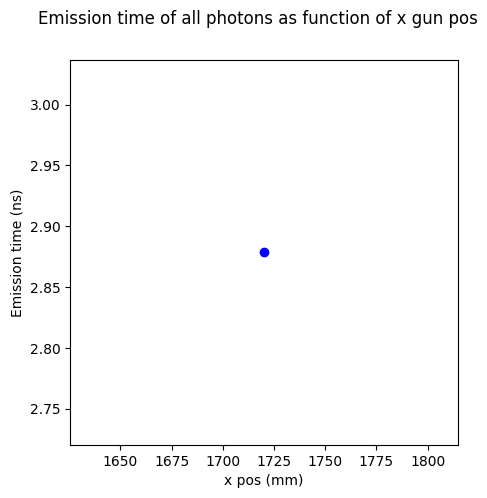

In [12]:
fig, ax1 = plot.subplots(1,1, figsize=(5,5))
fig.suptitle("Emission time of all photons as function of x gun pos")
ax1.set_ylabel("Emission time (ns)")
ax1.scatter(x_pos_list,emission_time_means,color = "blue")
ax1.set_xlabel("x pos (mm)")
# ax1.set_ylim(0,6)
fig.show()
# fig.savefig("plots/time_parameterization/x_pos_vary/emission_time_vs_x_pos_5GeV.jpeg")

In [57]:
len(emission_time_list)

8

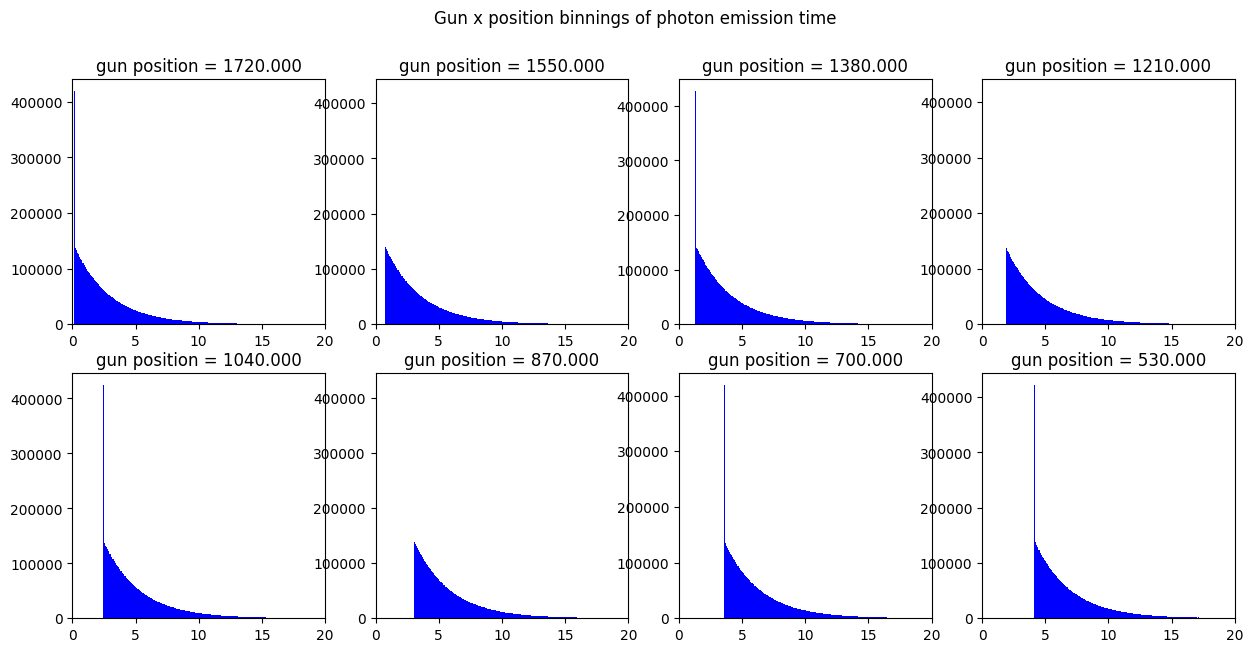

In [61]:
fig, axs = plot.subplots(2,4,figsize = (15,7))
fig.suptitle("Gun x position binnings of photon emission time")
for i in range(axs.shape[0]):
    n_columns = axs.shape[1]
    for j in range(n_columns):
        axs[i,j].set_title("gun position = %2.3f"%(x_pos_list[i * 4 + j]))
        axs[i,j].hist(emission_time_list[i * 4 + j], color = 'b', bins = 1000)
        axs[i,j].set_xlim(0,20)
fig.savefig("plots/time_parameterization/x_pos_vary/histos_emission_time_5GeV.jpeg")

In [ ]:
fig, axs = plot.subplots(4,5,figsize = (20,15))
fig.suptitle("Theta binnings of photon travel time")
for i in range(axs.shape[0]):
    n_columns = axs.shape[1]
    for j in range(n_columns):
        axs[i,j].set_title("theta = %2.3f"%(theta_bins_deg[i * 5 + j]))
        axs[i,j].hist(time_diff[i * 5 + j], color = 'r', bins = 1000)
fig.savefig("plots/time_parameterization/theta_vary/histos_travel_time_theta_daughter_cut.jpeg")